In [38]:
#ASCII XOR OPERATION
# import library
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for array operation
import string  # String utilities
import os  # OS file handling
import matplotlib.pyplot as plt

In [39]:
# ASCII CONVERSION
d = {chr(i): i for i in range(255)}  # character to ascii
c = {i: chr(i) for i in range(255)}  # ascii to character

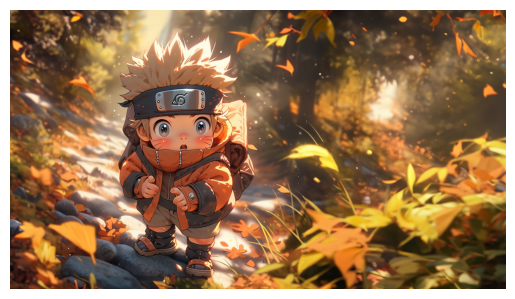

In [40]:
#  Load the image
image_path = r"D:\IBM CYBER\naruto.jpg"
x = cv2.imread(image_path)
xrgb = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.axis('off')
plt.show()

In [41]:
x.shape

(1080, 1920, 3)

In [42]:
key = "123"
text = "secret"

In [43]:
key

'123'

In [44]:
# ASCII values 
text_ascii = [d[ch]for ch in text] #List of ascii values of text characters
key_ascii = [d[ch]for ch in key] #List of ascii values of key
print(text_ascii)
print(key_ascii)

[115, 101, 99, 114, 101, 116]
[49, 50, 51]


In [45]:
#encrypt using pixel modification
x_enc = x.copy()
n =0 # number of rows
m =0 # number of columns
z = 0 #colour panel
l = len(text)
kl = 0 #key length
for i in range(l):
    orig_val=x_enc[n,m,z]
    new_val = d[text[i]]^d[key[kl]] #actual code important
    x_enc[n,m,z]=new_val
    print(f"Embedding'{text[i]}'(ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = {new_val} at pixel ({n},{m},{z}) [original = {orig_val}]")
    n=n+1
    m=m+1
    z=(z+1)%3
    m=(m+1)%3
    kl=(kl+1)%len(key)
    

Embedding's'(ASCII 115) XOR '1' (ASCII 49) = 66 at pixel (0,0,0) [original = 204]
Embedding'e'(ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (1,2,1) [original = 119]
Embedding'c'(ASCII 99) XOR '3' (ASCII 51) = 80 at pixel (2,1,2) [original = 137]
Embedding'r'(ASCII 114) XOR '1' (ASCII 49) = 67 at pixel (3,0,0) [original = 65]
Embedding'e'(ASCII 101) XOR '2' (ASCII 50) = 87 at pixel (4,2,1) [original = 119]
Embedding't'(ASCII 116) XOR '3' (ASCII 51) = 71 at pixel (5,1,2) [original = 164]


In [46]:
cv2.imwrite("encrypt.jpg",x_enc)

True

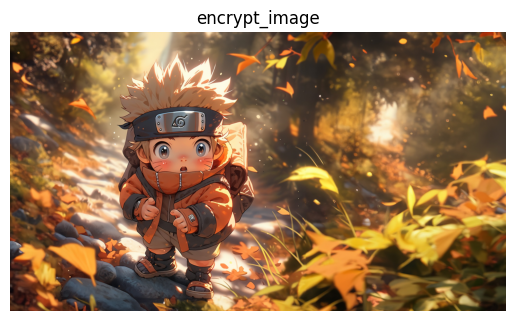

In [49]:
plt.imshow(cv2.cvtColor(x_enc,cv2.COLOR_BGR2RGB))
plt.title("encrypt_image")
plt.axis('off')
plt.show()

In [57]:
#decrypt
n,m,z = 0,0,0
kl=0
decrypt=""
for i in range(l):
    val=x_enc[n,m,z]
    orig_char = c[val^d[key[kl]]]
    decrypt = decrypt+orig_char
    
    print(f"Decrypting pixel ({n},{m},{z}): {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")
    
    n=n+1
    m=m+1
    m=(m+1)%3
    z=(z+1)%3
    kl=(kl+1)%len(key)
print(decrypt)

Decrypting pixel (0,0,0): 66 XOR 49 = 115 -> 's'
Decrypting pixel (1,2,1): 87 XOR 50 = 101 -> 'e'
Decrypting pixel (2,1,2): 80 XOR 51 = 99 -> 'c'
Decrypting pixel (3,0,0): 67 XOR 49 = 114 -> 'r'
Decrypting pixel (4,2,1): 87 XOR 50 = 101 -> 'e'
Decrypting pixel (5,1,2): 71 XOR 51 = 116 -> 't'
secret
